In [ ]:
from google.colab import files
!mkdir -p ~/.kaggle
!echo '{"username":"xxxxx","key":"xxxxxx"}' > ~/.kaggle/kaggle.json
!cp kaggle.json /root/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

In [ ]:
from zipfile import ZipFile


In [18]:
dataset = "/content/dogs-vs-cats.zip"

In [127]:
with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
dataset = "/content/train.zip"
with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print('the dataset is extracted')

In [130]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import tf_keras as tfk
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow

In [24]:
def display_image(image_path):
  img = mpimg.imread(image_path)
  imgplt = plt.imshow(img)
  plt.show()

In [23]:
def resize_images(original_folder, resized_folder):
  os.makedirs(resized_folder, exist_ok=True)
  for filename in os.listdir(original_folder)[:2000]:
    img_path = os.path.join(original_folder, filename)
    img = Image.open(img_path).resize((224, 224)).convert("RGB")
    newImgPath = os.path.join(resized_folder, filename)
    img.save(newImgPath)


In [33]:
def create_labels(image_folder):
  labels = []
  for filename in os.listdir(image_folder)[:2000]:
    label = 1 if filename.startswith("dog") else 0
    labels.append(label)
  return labels

In [26]:
def images_to_arrays(image_directory):
  files = glob.glob(os.path.join(image_directory, "*.*"))
  images = np.asarray([cv2.imread(file) for file in files])
  return images

In [42]:
def split_data(X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
  return X_train, X_test, np.array(Y_train), np.array(Y_test)

In [28]:
def scale_data(X_train, X_test):
  X_train_scaled = X_train / 255
  X_test_scaled = X_test / 255
  return X_train_scaled, X_test_scaled

In [120]:
def build_model():
    mobilenet_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4"
    pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)
    num_of_classes = 2
    model = tfk.Sequential([
        pretrained_model,
        tfk.layers.Dense(num_of_classes)
    ])
    model.compile(
        optimizer = "adam",
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ["acc"]
    )

    return model

In [131]:
def predict_image(model, image_path):
  input_image = cv2.imread(image_path)
  cv2_imshow(input_image)
  input_image_resize = cv2.resize(input_image, (224, 224))
  input_image_scaled = input_image_resize / 255
  image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
  input_prediction = model.predict(image_reshaped)
  input_pred_label = np.argmax(input_prediction)
  if input_pred_label == 0:
    print("The image represents a Cat")
  else:
    print("The image represents a Dog")

In [81]:
resize_images("/content/train/", "/content/image_resized")

In [82]:
labels = create_labels("/content/image_resized/")

In [83]:
import glob
images = images_to_arrays("/content/image_resized/")

In [84]:
X_train, X_test, Y_train, Y_test = split_data(images, labels)

In [85]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [121]:
model = build_model()

In [122]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 125s 2s/step - loss: 0.1746 - acc: 0.9269
Epoch 2/5
50/50 [==============================] - 76s 2s/step - loss: 0.0703 - acc: 0.9725
Epoch 3/5
50/50 [==============================] - 79s 2s/step - loss: 0.0536 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 83s 2s/step - loss: 0.0406 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 81s 2s/step - loss: 0.0332 - acc: 0.9894


In [123]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print("Test loss = ", score)
print("Test Accuracy = ", acc)

13/13 [==============================] - 35s 2s/step - loss: 0.0959 - acc: 0.9750
Test loss =  0.09585413336753845
Test Accuracy =  0.9750000238418579


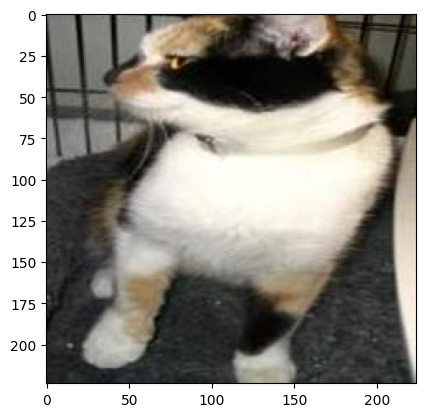

In [124]:
import matplotlib.image as mpimg
display_image("/content/image_resized/cat.10025.jpg")

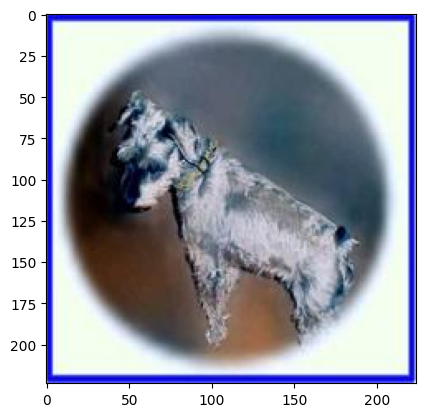

In [126]:
import matplotlib.image as mpimg
display_image("/content/image_resized/dog.10033.jpg")

In [128]:
dataset = "/content/test1.zip"
with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


Path of the image to be predicted: /content/test1/10002.jpg


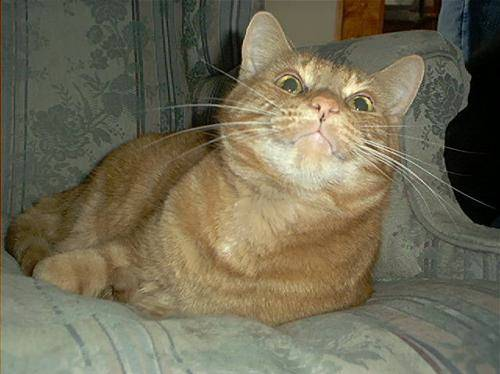

1/1 [==============================] - 2s 2s/step
The image represents a Cat


In [132]:
input_image_path = input("Path of the image to be predicted: ")
predict_image(model, input_image_path)

SyntaxError: invalid syntax (<ipython-input-134-5e2e032e0a41>, line 1)